# Pymaceuticals Inc.
---

### Analysis

- Below are the results of a 45-day study assessing the tumor sizes of mice treated with several different drug regimes, including Capomulin, for squamous cell carcinoma. As can be seen in the summary statistic table, Capomulin has one of the lowest mean tumor volume values, second to Ramicane with a comparably low value. In some mice, treatment with Capomulin was correlated with a reduction in tumor size over time. Further details can be found in the tables and charts below.
 

In [295]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import random

# Set random seed for testing
random.seed(42)

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_df = pd.merge(study_results, mouse_metadata, on='Mouse ID', how='inner')

# Display the data table for preview
merged_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [296]:
# Checking the number of mice.
total_mice = len(merged_df['Mouse ID'].unique())
total_mice

249

In [297]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicates = merged_df[merged_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
duplicate_ids = duplicates['Mouse ID'].unique()
duplicate_ids

array(['g989'], dtype=object)

In [298]:
# Optional: Get all the data for the duplicate mouse ID.
duplicates

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [299]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df = merged_df[merged_df['Mouse ID'] != 'g989']
cleaned_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [300]:
# Checking the number of mice in the clean DataFrame.
total_mice_cleaned = len(cleaned_df['Mouse ID'].unique())
total_mice_cleaned

248

## Summary Statistics

In [302]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.

mean_volume = cleaned_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median_volume = cleaned_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance_volume = cleaned_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
stddev_volume = cleaned_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
stderr_volume = cleaned_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].apply(st.sem)

# Assemble the resulting series into a single summary DataFrame.
summary_df = pd.DataFrame({"Mean Tumor Volume" : mean_volume,
                           "Median Tumor Volume" : median_volume,
                           "Tumor Volume Variance" : variance_volume,
                           "Tumor Volume Std. Dev." : stddev_volume,
                           "Tumor Volume Std. Err." : stderr_volume
                          })
summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [303]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_agg_df = cleaned_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(
    mean='mean',
    median='median',
    var='var',
    std='std',
    sem=lambda x: st.sem(x)
)
summary_agg_df

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

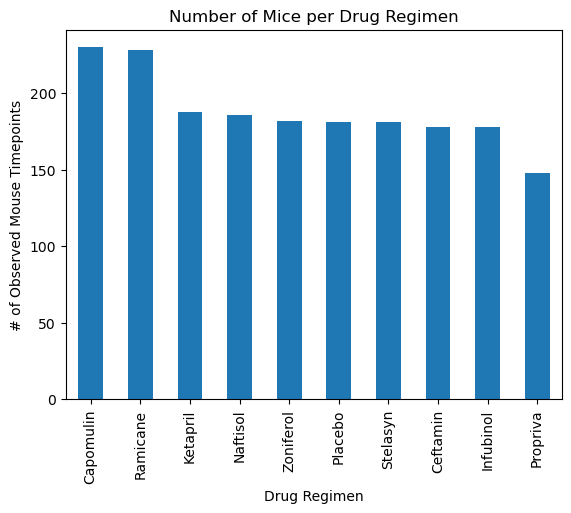

In [305]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
regimen_count = cleaned_df.groupby('Drug Regimen')['Timepoint'].count()
regimen_count = regimen_count.sort_values(ascending=False)
#regimen_count = regimen_count.set_index('Drug Regimen')
regimen_count.plot(kind = 'bar')
plt.title("Number of Mice per Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()

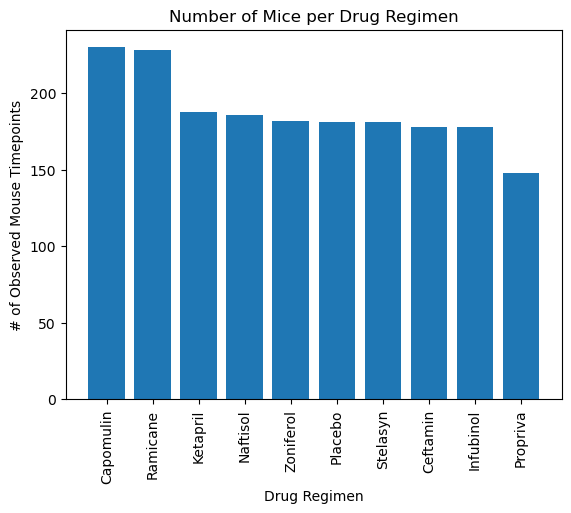

In [306]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
regimen_count = cleaned_df.groupby('Drug Regimen')['Timepoint'].count()
regimen_count = regimen_count.sort_values(ascending=False)
regimen_count
labels = regimen_count.index
values = regimen_count.values
plt.bar(labels, values)
plt.xlabel("Drug Regimen")
plt.xticks(rotation=90)
plt.ylabel("# of Observed Mouse Timepoints")
plt.title("Number of Mice per Drug Regimen")
plt.show()

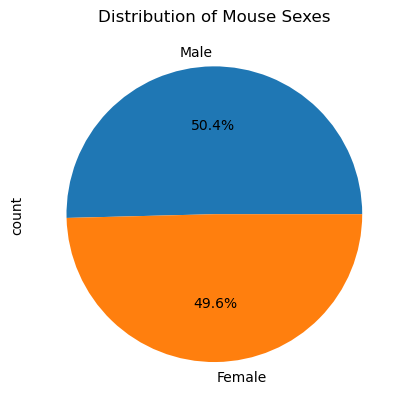

In [307]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
unique_mice = cleaned_df.drop_duplicates(subset='Mouse ID')
mouse_genders = unique_mice.set_index('Mouse ID')['Sex']
mouse_genders_count = mouse_genders.value_counts()

# Make the pie chart
mouse_genders_count.plot(kind='pie', autopct='%1.1f%%')
plt.title("Distribution of Mouse Sexes")
plt.show()

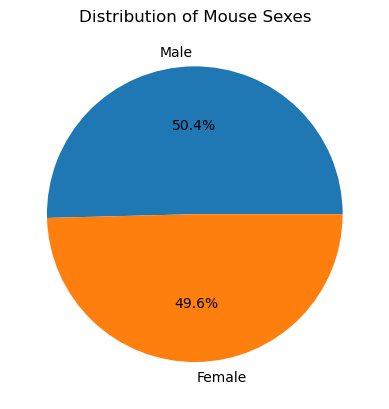

In [308]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
unique_mice = cleaned_df.drop_duplicates(subset='Mouse ID')
mouse_genders = unique_mice.set_index('Mouse ID')['Sex']
mouse_genders_count = mouse_genders.value_counts()

# Make the pie chart
plt.pie(mouse_genders_count, labels = mouse_genders_count.index, autopct='%1.1f%%')
plt.title("Distribution of Mouse Sexes")
plt.show()

## Quartiles, Outliers and Boxplots

In [310]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint_df = cleaned_df.groupby('Mouse ID')['Timepoint'].max().reset_index()
last_timepoint_df

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_final_times = pd.merge(last_timepoint_df, cleaned_df, on=['Mouse ID', 'Timepoint'], how='left')
merged_final_times.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29


In [311]:
# Put treatments into a list for for loop (and later for plot labels)
regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
final_tumorvol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for regimen in regimens:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    regimens_df = merged_final_times[merged_final_times['Drug Regimen'] == regimen]
    tumor_volumes = regimens_df['Tumor Volume (mm3)']

    # add subset
    final_tumorvol.append(tumor_volumes)

    # Determine outliers using upper and lower bounds
    quartiles = tumor_volumes.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    outliers = tumor_volumes[(tumor_volumes < lower_bound) | (tumor_volumes > upper_bound)]

    print(f"{regimen}'s potential outliers: {outliers}")


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


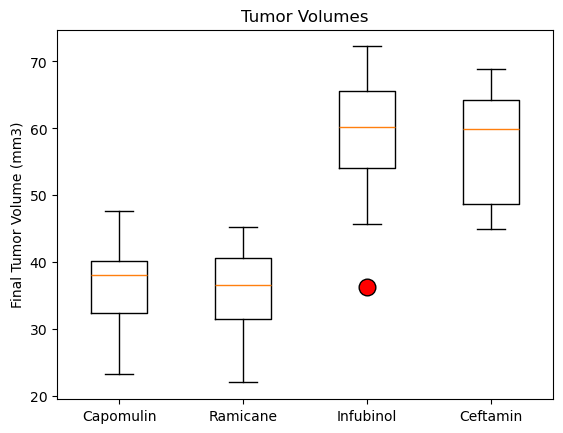

In [312]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots()
flierprops = dict(marker='o', markerfacecolor='red', markersize=12, linestyle='none')
ax1.boxplot(final_tumorvol, positions=range(1, len(regimens) + 1), flierprops=flierprops)
ax1.set_xticklabels(regimens)
ax1.set_title('Tumor Volumes')
ax1.set_ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

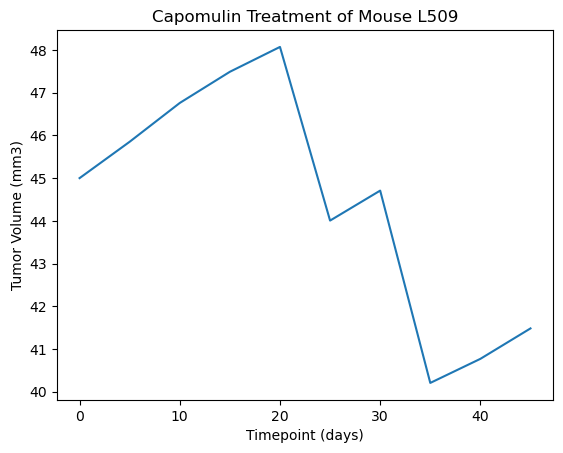

In [314]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
single_mouse = cleaned_df[cleaned_df['Mouse ID'] == 'l509']
single_mouse
l509_timepoint = single_mouse['Timepoint']
l509_volume = single_mouse['Tumor Volume (mm3)']
plt.plot(l509_timepoint, l509_volume)
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Treatment of Mouse L509")
plt.show()


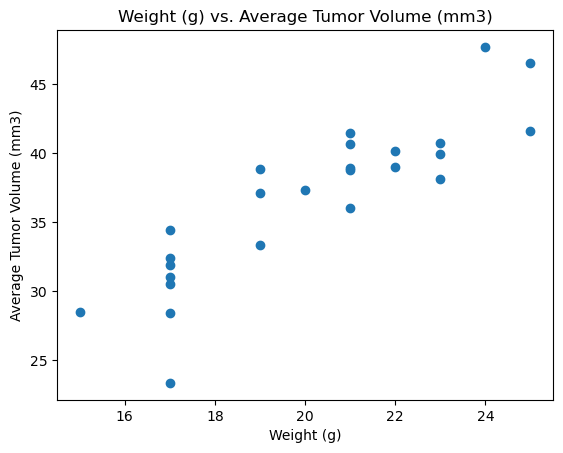

In [316]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
avg_vol_capo = capomulin_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
avg_mass_capo = capomulin_df.groupby('Mouse ID')['Weight (g)'].mean()
avgs_df = pd.merge(avg_vol_capo, avg_mass_capo, on='Mouse ID', how='inner')
capomulin_weights = avgs_df['Weight (g)']
capomulin_vol = avgs_df['Tumor Volume (mm3)']

plt.scatter(capomulin_weights, capomulin_vol)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Weight (g) vs. Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.88


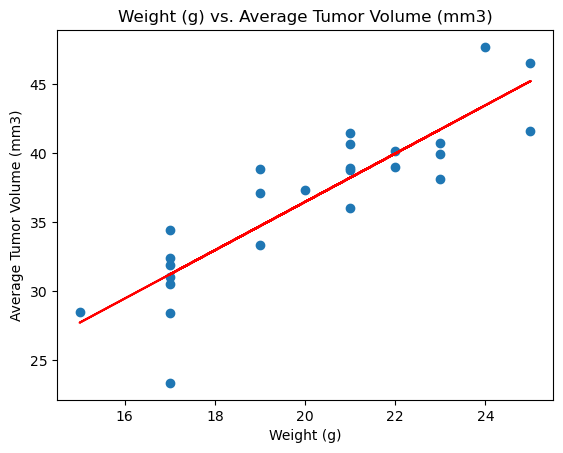

In [318]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation = st.pearsonr(capomulin_weights,capomulin_vol)
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(capomulin_weights, capomulin_vol)
regress_values = capomulin_weights * slope + intercept
plt.scatter(capomulin_weights, capomulin_vol)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Weight (g) vs. Average Tumor Volume (mm3)")
plt.plot(capomulin_weights,regress_values,"r-")